In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
from scipy import interpolate
from glob import glob
import sys
from tqdm import tqdm
from scipy.stats import norm, poisson
from scipy.integrate import simps

In [2]:
root_dir = abspath(join(pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

In [5]:
style()

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
spectral_dir = join(root_data_dir, "Spectral-Class-Cluster-no")
eff_dir = join(root_data_dir, "Effective-Volume-no")

In [7]:
df_comp = vaex.open(join(eff_dir, "effective-volume-completeness.hdf5"))
df_comp

#,z,0,1,2,3,4,5,6,7,8,9,10,11
0,-395.6551203165932,0.7734588031422185,0.7312843581698955,0.7424849314999173,0.7644668193835468,0.77756402242898,0.7682705841624763,0.7704044642479003,0.7646345964627905,0.7741264601424465,0.7618955117353707,0.7736947798938787,0.7489587224362103
1,-394.06614392977957,0.7732258405901855,0.7310802316966131,0.7422909702391937,0.7643007585050986,0.7773506409644422,0.7679698801562168,0.770068578786956,0.7642629372117944,0.7738391832560769,0.7617044839499741,0.7735032273141279,0.7485821350283011
2,-392.47716754296596,0.772992058790857,0.7308753873823739,0.7420963268849874,0.7641341136489911,0.7771365091124008,0.7676681186798103,0.7697315121350717,0.7638899709660308,0.7735508961180148,0.761512784387095,0.773311001111378,0.7482042232950318
3,-390.8881911561523,0.7727574524197375,0.7306698205617481,0.7419009970042013,0.7639668810198075,0.7769216219958983,0.7673652928604926,0.7693932566153909,0.7635156892310114,0.7732615921623796,0.7613204086806826,0.7731180969075824,0.7478249786292769
4,-389.29921476933873,0.7725219179497625,0.7304639964619846,0.7417048110050452,0.7637990643528954,0.7767060357327886,0.7670618272191355,0.7690542951263442,0.7631405524580049,0.7729717193282168,0.761127987154744,0.7729251874456786,0.7474447591387641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,389.2992147693387,0.7725219179497625,0.7304639964619846,0.7417048110050452,0.7637990643528954,0.7767060357327886,0.7670618272191355,0.7690542951263442,0.7631405524580049,0.7729717193282168,0.761127987154744,0.7729251874456786,0.7474447591387641
495,390.8881911561523,0.7727574524197375,0.7306698205617481,0.7419009970042013,0.7639668810198075,0.7769216219958983,0.7673652928604926,0.7693932566153909,0.7635156892310114,0.7732615921623796,0.7613204086806826,0.7731180969075824,0.7478249786292769
496,392.47716754296596,0.772992058790857,0.7308753873823739,0.7420963268849874,0.7641341136489911,0.7771365091124008,0.7676681186798103,0.7697315121350717,0.7638899709660308,0.7735508961180148,0.761512784387095,0.773311001111378,0.7482042232950318
497,394.06614392977957,0.7732258405901855,0.7310802316966131,0.7422909702391937,0.7643007585050986,0.7773506409644422,0.7679698801562168,0.770068578786956,0.7642629372117944,0.7738391832560769,0.7617044839499741,0.7735032273141279,0.7485821350283011


In [8]:
name = "Vertical-Number-no"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Vertical-Number-no already exist. Good to go!


In [9]:
spec_files = glob(join(spectral_dir, "*.hdf5"))
spec_files.sort()
spec_files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(-0.10)_(0.11).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.11)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.20)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.29)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.31)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.33)_(0.35).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.35)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.37)_(0.38).hdf5'

In [10]:
gaia = vaex.open(spec_files[0])
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.014884639099905679,-0.6277107372592441,8.755000114440918,8.656999588012695,AAA,2309518882743792512,23.22193717956543,22.29106181287425,0.015476686879992485,6.508986172951364,0.016319049522280693,4.789413549620276,0.020170677453279495,9.131726264953613,9.230249404907227,8.934432983398438,1889.544189453125,2443.355224609375,1.1517304182052612,1.167120337486267,2.951179464847555,-1.3351842543237686,208.5220947265625,204.33360290527344,210.59359741210938,0.003100000089034438,0.0010000000474974513,0.00570000009611249,nan,nan,nan,A,--,13.979635238647461,gaia,0.8730981349945068,0.8730981349945068,1.0,7851.72216796875,gspphot,7.68994140625,6.4814453125,0.0,4.14709997177124,gspphot,0.008999824523925781,0.014599800109863281,0.0,nan,--,nan,nan,nan,-1.2071000337600708,gspphot,0.004799962043762207,0.006800055503845215,0.0,0.12999999523162842,rave,nan,nan,-1.0,nan,--,nan,nan,nan,0.09800052642822266,2.1564118070290146,208.79383031755194,-203.02519970723176,48.7404540655227,-8.415224816113692,-21.64352857182297,0.016011703235616633,0.015794447555597668,-21.420227000145907,-8.328402885890153,-0.09155582963669412,-0.038488697266941825,-18.593699921256633,0.8730981349945068,0.8492448485468144,-17.56504054597298,0.22240955574805651,15.671299950086627,0.21851120838760413,11.50231723983446,0.056570682463120345,0.656183260425856,2.2724350893667364
1,0.01692606345950085,0.3891393605162341,7.978000164031982,7.916999816894531,AAA,2847236045035991808,7.534960746765137,0.31428973130157245,0.028740057721734047,-7.528403412132262,0.035291653126478195,5.414626649593402,0.03218960762023926,8.257993698120117,8.308849334716797,8.131924629211426,1606.518310546875,3663.614990234375,1.0435644388198853,1.1647926568984985,-1.2447639901461083,-0.6851463533673376,185.764404296875,183.57119750976562,187.21949768066406,0.40720000863075256,0.4049000144004822,0.41269999742507935,nan,nan,nan,A,--,-1.9623053073883057,gaia,0.8112114071846008,0.8112114071846008,1.0,10111.888671875,gspphot,14.7001953125,61.91796875,0.0,4.351399898529053,gspphot,0.004600048065185547,0.0062999725341796875,0.0,nan,--,nan,nan,nan,0.04969999939203262,gspphot,0.06459999922662973,0.016599997878074646,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.06100034713745117,1.6458427462058371,184.68494038736586,-116.86610814118873,143.00643333017175,-1.4773945887055326,-7.388703621087389,0.02914644273095347,0.03495678152203822,-6.468120044174079,-1.2933209995171295,-0.049143105132327135,-0.026648281766649008,-3.766716399021818,0.8112114071846008,0.5147320000869019,-5.61240292518195,0.6289117267272132,-0.5723895823176695,0.20300791047069605,-5.730978622228241,0.5958421596550898,0.5031712031916151,2.133604850608599
2,0.0035158959649724967,0.5305083072141416,8.081000328063965,8.039999961853027,AAA,2873312200239661568,14.617414474487305,14.451251005288686,0.030547887086868286,-2.1977605786351746,0.020109251141548157,5.780108878698743,0.030021460726857185,8.32446002960205,8.370553970336914,8.213418960571289,1918.97314453125,3164.412841796875,1.0105706453323364,1.161336064338684,-1.2188784047472103,-0.5448464699442576,174.9145965576172,173.51480102539062,177.49130249023438,0.21850000321865082,0.21230000257492065,0.22370000183582306,nan,nan,nan,A,--,2.5488598346710205,gaia,0.590409755706787

# Constant Volume Prior

Assume the parallax has normal distribution with mean $\mu_\varpi$ and standard deviation $\sigma_\varpi$.
\begin{align*}
 p(\varpi|\mu_\varpi, \sigma_\varpi) = \frac{1}{\sqrt{2\pi}\sigma_\varpi} \exp\left(-\frac{(\varpi-\mu_\varpi)^2}{2\sigma_\varpi^2}\right)
\end{align*}

And $\mu_\varpi$ is the true parallax. We have relation between distance and parallax, $\varpi = 1/r$.

\begin{align*}
 p(\varpi|r, \sigma_\varpi) = \frac{1}{\sqrt{2\pi}\sigma_\varpi} \exp\left(-\frac{(\varpi-1/r)^2}{2\sigma_\varpi^2}\right)
\end{align*}

We want to infer the real parallax or the real distance, so using Bayes' theorem, we have
\begin{align*}
    p(r|\varpi, \sigma_\varpi) = \frac{p(\varpi|r, \sigma_\varpi) p(r)}{p(\varpi)}
\end{align*}

With constant volume prior, $p(r) \propto r^2$, so
\begin{align*}
    p_u(r|\varpi, \sigma_\varpi) \propto \frac{r^2}{\sigma_\varpi} \exp\left(-\frac{(\varpi-1/r)^2}{2\sigma_\varpi^2}\right)
\end{align*}

Given the star galactic latitude $b$, the distance $r$ is related to the height $z$ by
\begin{align*}
    r = \frac{z}{\sin b}
\end{align*}

so

\begin{align*}
    p(z|\varpi, \sigma_\varpi) |\textup{d}z| &= p(r|\varpi, \sigma_\varpi) |\textup{d}r| \\
    &= p(r|\varpi, \sigma_\varpi) \left|\frac{\textup{d}r}{\textup{d}z}\right| \\
    &= p(r|\varpi, \sigma_\varpi) \frac{1}{\sin b} \\
    &\propto \frac{z^2}{\sigma_\varpi \sin^3 b} \exp\left(-\frac{(\varpi-\sin b/z)^2}{2\sigma_\varpi^2}\right)
\end{align*}

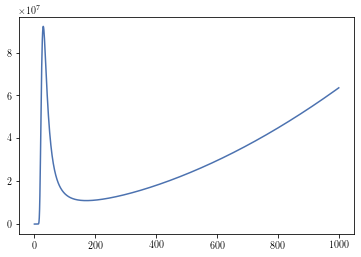

In [11]:
from scipy.stats import norm

mu_p = 20/1000
sigma_p = 5/1000
b = np.radians(30)

def z_pdf(z, b, parallax, parallax_error):
    return norm.pdf(np.sin(b)/z, loc=parallax, scale=parallax_error)*z**2/parallax_error/np.sin(b)**3

zweight = np.linspace(0.1, 1000, 1000)
plt.plot(zweight, z_pdf(zweight, b, mu_p, sigma_p))

  0%|          | 0/2327 [00:00<?, ?it/s]

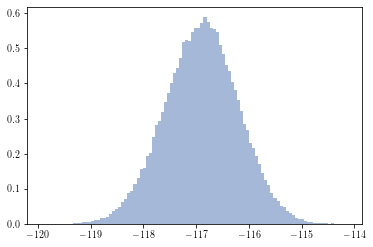

  0%|          | 1/2327 [00:00<35:29,  1.09it/s]

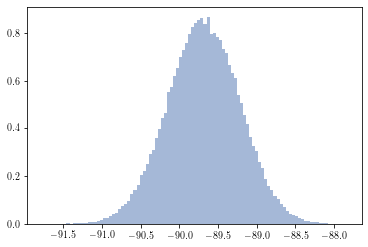

  0%|          | 2/2327 [00:01<33:12,  1.17it/s]

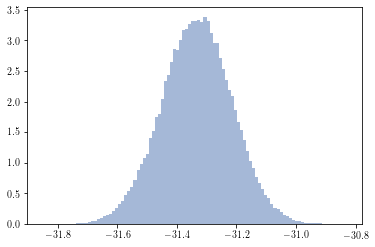

  0%|          | 3/2327 [00:02<30:21,  1.28it/s]

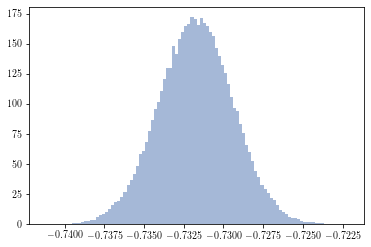

  0%|          | 3/2327 [00:03<41:14,  1.06s/it]


In [12]:
p = gaia['parallax'].to_numpy()/1000
p_err = gaia['e_parallax'].to_numpy()/1000
b = gaia['GLAT'].to_numpy()

def z_pdf_s(z, b, parallax, parallax_error):
    if b*z <= 0:
        return 0
    return norm.pdf(np.sin(b)/z, loc=parallax, scale=parallax_error)*z**2/parallax_error/np.sin(np.abs(b))**3
z_pdf = np.vectorize(z_pdf_s)
f = p_err/p


M = 100_000
zs = np.empty((len(p), M))

for i, (p_i, p_err_i, b_i) in enumerate(zip(p, p_err, tqdm(b))):
    f = p_err_i/p_i
    mode = 500
    delta = 100
    if f < 0.05:
        mode = 1/p_i*np.sin(np.abs(b_i))
        delta = p_err_i/p_i*mode
    zweight = np.linspace(mode-5*delta, mode+5*delta, 1000)
    if b_i < 0:
        zweight = -zweight
    pdf = z_pdf(zweight, b_i, p_i, p_err_i)
    pdf = pdf/pdf.max()
    mask = (pdf>1e-6)
    zweight = zweight[mask]
    pdf = pdf[mask]
    zweight = np.linspace(zweight.min(), zweight.max(), 1000)
    pdf = z_pdf(zweight, b_i, p_i, p_err_i)
    cdf = np.cumsum(pdf)
    cdf = cdf/cdf.max()
    inverse_cdf = interpolate.interp1d(cdf, zweight, fill_value='extrapolate', bounds_error=False)
    zs_i = inverse_cdf(np.random.rand(M))
    zs[i] = zs_i
    plt.hist(zs_i, bins=100, density=True, alpha=0.5)
    plt.show()
    if i > 2:
        break

run the above code in dedicated script

In [13]:
files = glob(join(data_dir, "*.npy"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(-0.10)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.16)_(0.20).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.20)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.31)_(0.33).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.33)_(0.35).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.35)_(0.37).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.37)_(0.38).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.38)_(0.40).npy']

In [29]:
index = 0
z_arr = np.load(files[index])
z_arr.shape

(2838, 10000)

(0.0, 1.0)

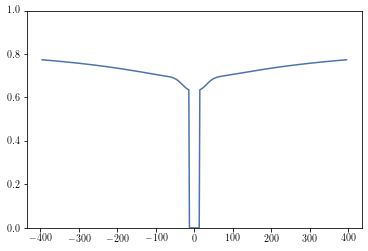

In [30]:
z = df_comp['z'].to_numpy()
frac = df_comp[str(index)].to_numpy()
compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

plt.plot(z, frac)
plt.ylim(0,1)

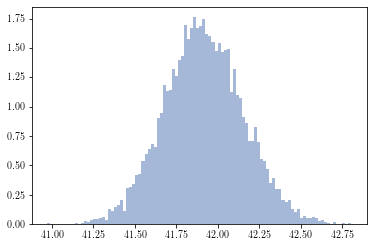

In [31]:
plt.hist(z_arr[1800], bins=100, density=True, alpha=0.5);

In [32]:
zb = np.max(z)
zmax = np.minimum(np.max(z_arr), zb)
zmin = np.maximum(np.min(z_arr), -zb)
zmax, zmin

(395.6551203165932, -395.6551203165932)

In [33]:
def correct_z(z, znum):
    comp = compz(z)
    mask = comp == 0
    comp[mask] = 1
    corr = znum/comp
    corr[mask] = 0
    return corr

In [34]:
zl = np.floor(np.maximum(zmin, -zb))
zu = np.ceil(np.minimum(zmax, zb))
zedge = np.linspace(zl, zu, 20)

gaia = vaex.open(spec_files[index])
zs = gaia['z'].to_numpy()
znum, _ = np.histogram(zs, bins=zedge)
zmid = (zedge[1:] + zedge[:-1])/2
zcorr = correct_z(zmid, znum)
mask = zcorr > 0
zcorr = zcorr[mask]
znum = znum[mask]
zerr = zcorr/np.sqrt(znum)

M = z_arr.shape[1]
znum_est = np.empty((M, len(zcorr)), dtype=int)
for i in tqdm(range(M)):
    z_realization = z_arr[:, i]
    znum_est_i = np.histogram(z_realization, bins=zedge)[0]
    znum_est[i] = znum_est_i[mask]
zmid = zmid[mask]

100%|██████████| 10000/10000 [00:01<00:00, 5072.71it/s]


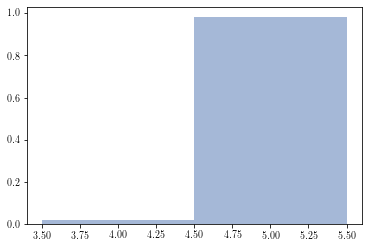

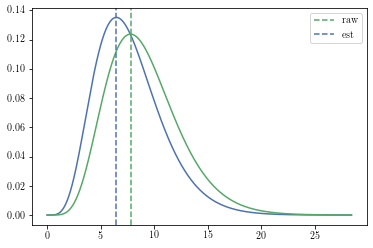

mu 7.765631851993145
raw 9.086445205103137


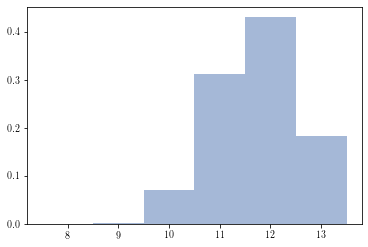

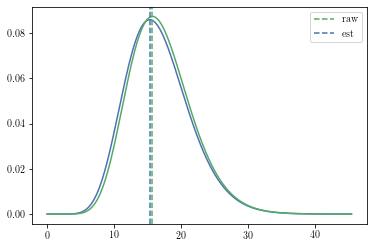

mu 16.661924437810935
raw 17.02612700139687


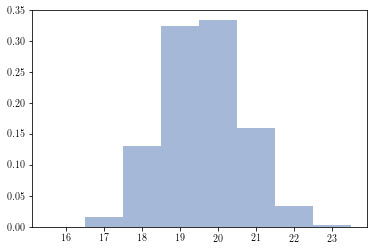

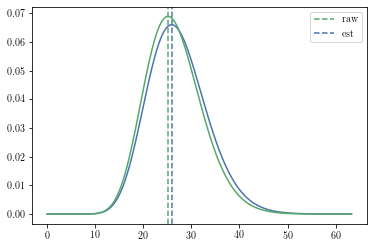

mu 27.256287151640844
raw 26.4626219594268


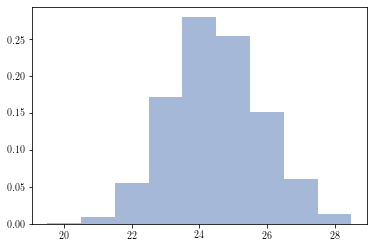

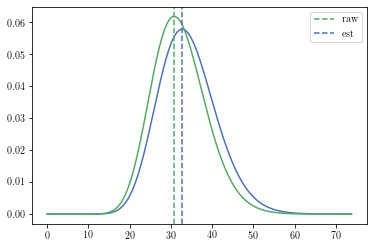

mu 34.113549221526604
raw 32.129800077239885


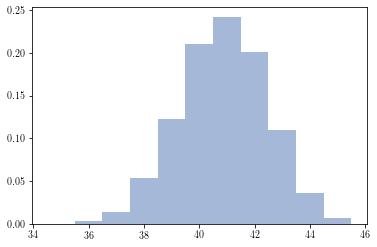

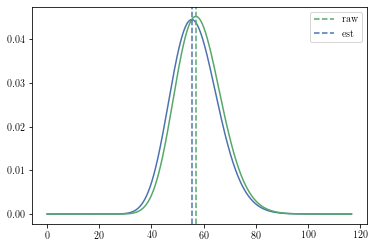

mu 56.80780484316501
raw 58.349412762044274


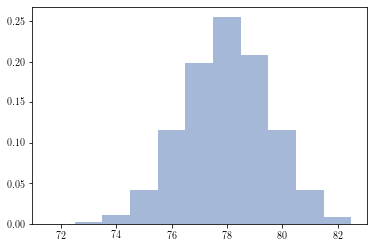

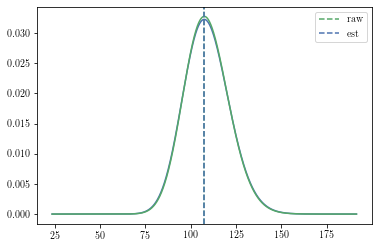

mu 108.85526700529023
raw 108.86961803962521


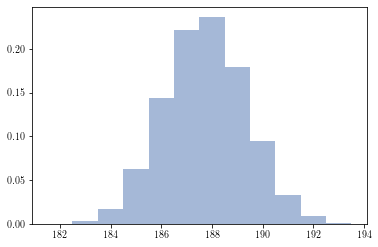

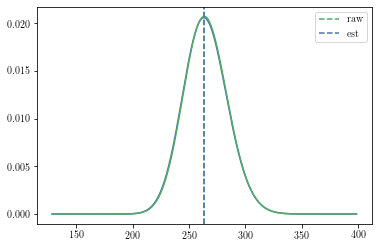

mu 264.56548661049266
raw 264.94900683313574


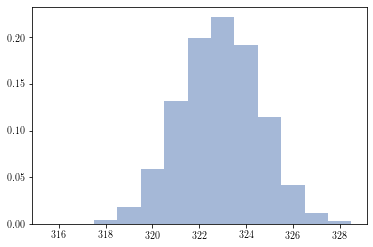

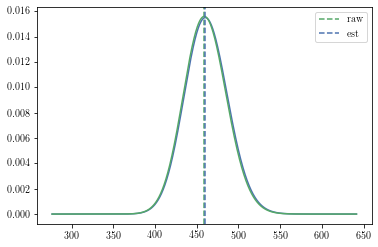

mu 461.83115374520764
raw 460.5853458574018


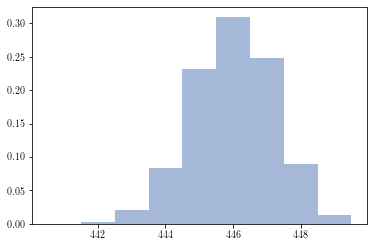

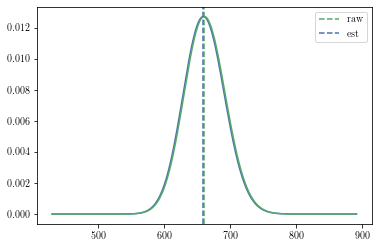

mu 660.5645230559178
raw 662.0540037964331


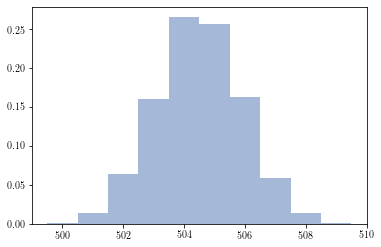

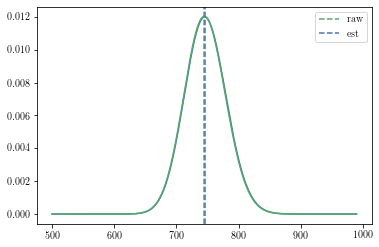

mu 747.0045424722526
raw 746.2885533866045


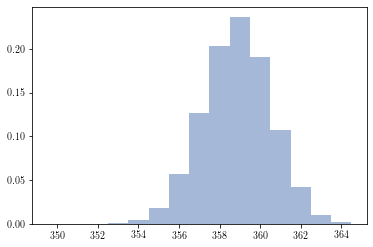

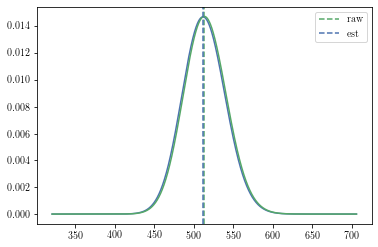

mu 513.1416169940929
raw 514.7718571347432


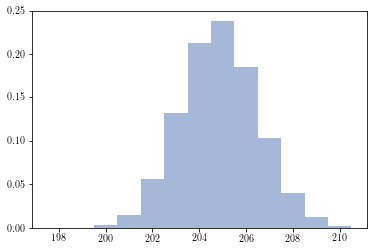

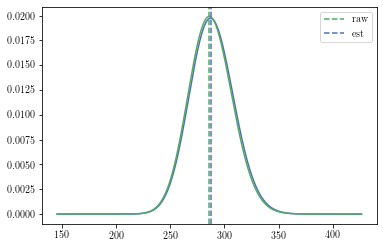

mu 288.56987638416837
raw 287.3785523851472


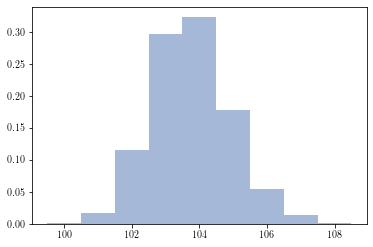

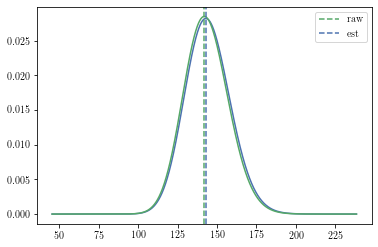

mu 144.3527744062384
raw 143.3220288116585


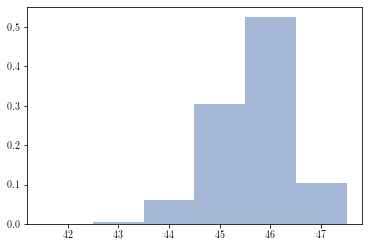

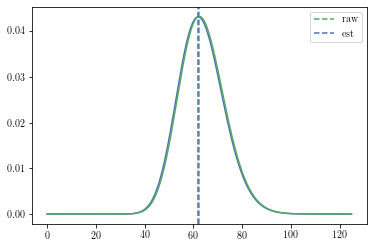

mu 63.322804330174
raw 63.77726511200188


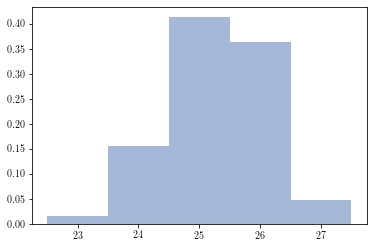

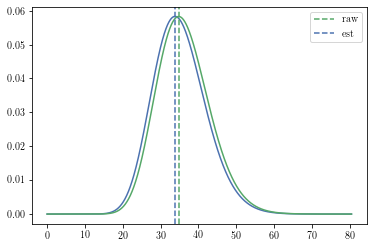

mu 35.175126942853574
raw 36.146025086894866


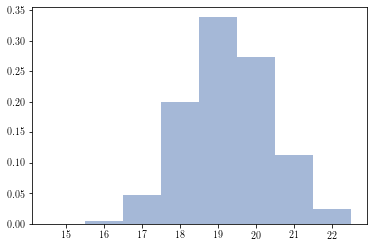

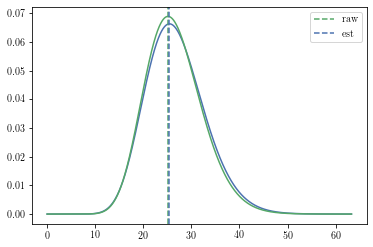

mu 26.810847618024496
raw 26.4626219594268


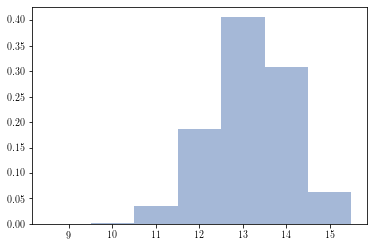

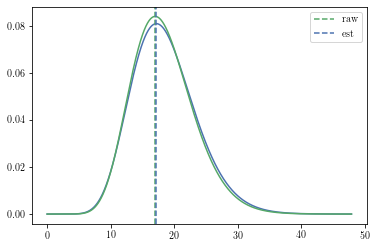

mu 18.554258706072055
raw 18.3358290784274


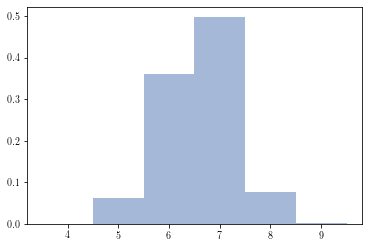

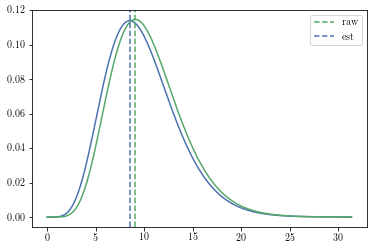

mu 9.86023023678996
raw 10.384508805832157


In [35]:
z_est = np.empty_like(znum)
z_err = np.empty_like(znum)
for i in range(len(zmid)):
    nz_min = np.floor(znum_est[:, i].min())
    nz_max = np.ceil(znum_est[:, i].max())
    bins = np.arange(nz_min-1/2, nz_max+1/2)
    zweight, n_edge = np.histogram(znum_est[:, i], bins=bins, density=True)
    ns = (n_edge[1:] + n_edge[:-1]) / 2
    mask = zweight > 0
    zweight = zweight[mask]
    ns = ns[mask]
    plt.bar(ns, zweight, width=1, alpha=0.5)
    plt.show()
    m = 5
    lambdas = np.linspace(np.maximum(0, znum[i]-m*zerr[i]), znum[i]+m*zerr[i], 10_000)
    dlambda = lambdas[1] - lambdas[0]
    pn = np.sum(zweight[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
    comp = compz(zmid[i])
    lambdas = lambdas/comp
    area = np.trapz(pn, lambdas)
    pn = pn / area
    pn =(pn[1:] + pn[:-1])/2
    dlambda = np.diff(lambdas)
    lambdas = (lambdas[1:] + lambdas[:-1])/2
    mu = np.sum(pn * lambdas * dlambda)
    
    zi_est = lambdas[np.argmax(pn)]
    z_est[i] = zi_est
    Elambda2 = np.sum(pn * lambdas**2*dlambda)
    sigma2 = Elambda2 - mu**2
    zi_err = np.sqrt(sigma2)
    z_err[i] = zi_err
    plt.plot(lambdas, pn, c='C0')
    plt.plot(lambdas, poisson.pmf(znum[i], lambdas*comp)*comp, 'C1')
    plt.axvline(zcorr[i], c='C1', ls='--', label='raw')
    plt.axvline(zi_est, c='C0', ls='--', label="est")
    plt.legend()
    plt.show()
    print("mu", mu)
    print("raw", (znum[i]+1)/comp)
    # break

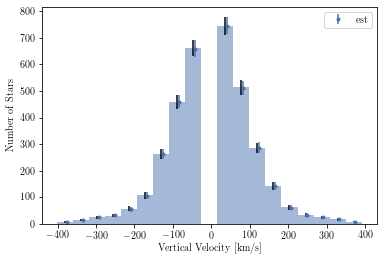

In [36]:
dz = np.min(np.diff(zedge))
plt.bar(zmid-5, zcorr, yerr=zerr, width=dz, alpha=0.5)
plt.errorbar(zmid, z_est, yerr=z_err, fmt='.', label="est")
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.legend()
# plt.yscale('log')
plt.show()

In [37]:
df = vaex.from_arrays(z=zmid, znum=z_est/z_est.max(), zerr=z_err/z_est.max())
df

#,z,znum,zerr
0,-375.1578947368421,0.008053691275167786,0.004026845637583893
1,-333.47368421052636,0.020134228187919462,0.005369127516778523
2,-291.7894736842105,0.03355704697986577,0.008053691275167786
3,-250.10526315789474,0.042953020134228186,0.009395973154362415
4,-208.42105263157896,0.0738255033557047,0.012080536912751677
...,...,...,...
13,208.4210526315789,0.08187919463087248,0.012080536912751677
14,250.10526315789468,0.04429530201342282,0.008053691275167786
15,291.7894736842105,0.03355704697986577,0.008053691275167786
16,333.4736842105263,0.022818791946308724,0.006711409395973154


In [38]:
name = files[2].split("/")[-1].replace(".npy", ".hdf5")
name

'gaia_(0.16)_(0.20).hdf5'

In [39]:
join(data_dir, name)

'/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.16)_(0.20).hdf5'

# all of them

In [40]:
files

['/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(-0.10)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.16)_(0.20).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.20)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.31)_(0.33).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.33)_(0.35).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.35)_(0.37).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.37)_(0.38).npy',
 '/home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.38)_(0.40).npy']

In [41]:
spec_files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(-0.10)_(0.11).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.11)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.20)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.29)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.31)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.33)_(0.35).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.35)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.37)_(0.38).hdf5'

In [42]:
np.load(files[0])

array([[-203.41792039, -201.81285732, -203.41343527, ..., -203.2495374 ,
        -204.20957797, -202.57344276],
       [-117.58396218, -116.7075798 , -116.78542823, ..., -116.71775648,
        -117.55719395, -117.15813088],
       [ -89.88388031,  -90.22128409,  -91.01616687, ...,  -89.57004107,
         -89.69804233,  -89.68438723],
       ...,
       [ -74.04850662,  -75.14876514,  -75.48291985, ...,  -76.06478941,
         -74.40446155,  -74.31439181],
       [ -14.80909628,  -14.78665891,  -14.75559337, ...,  -14.72869155,
         -14.78306696,  -14.75587172],
       [  31.38103132,   31.34802746,   31.37437617, ...,   31.3164099 ,
          31.24945678,   31.36011716]])

0 /home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(-0.10)_(0.11).npy
reading big data...
done reading
generating


generate: 100%|██████████| 10000/10000 [00:01<00:00, 5177.49it/s]


estimating


Estimating z: 100%|██████████| 18/18 [00:00<00:00, 112.13it/s]


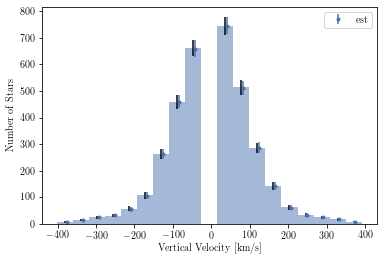

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 1 /home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.11)_(0.16).npy
reading big data...
done reading
generating


generate: 100%|██████████| 10000/10000 [00:01<00:00, 6937.45it/s]


estimating


Estimating z: 100%|██████████| 19/19 [00:00<00:00, 117.23it/s]


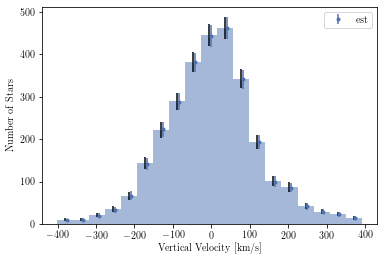

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 2 /home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.16)_(0.20).npy
reading big data...
done reading
generating


generate: 100%|██████████| 10000/10000 [00:02<00:00, 4979.38it/s]


estimating


Estimating z: 100%|██████████| 19/19 [00:00<00:00, 103.91it/s]


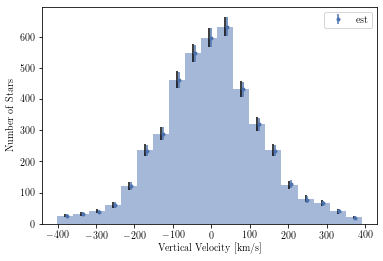

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 3 /home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.20)_(0.24).npy
reading big data...
done reading
generating


generate: 100%|██████████| 10000/10000 [00:03<00:00, 2607.98it/s]


estimating


Estimating z: 100%|██████████| 19/19 [00:00<00:00, 65.27it/s]


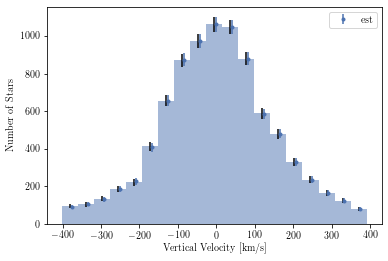

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 4 /home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.24)_(0.27).npy
reading big data...
done reading
generating


generate: 100%|██████████| 10000/10000 [00:04<00:00, 2046.92it/s]


estimating


Estimating z: 100%|██████████| 19/19 [00:00<00:00, 50.11it/s]


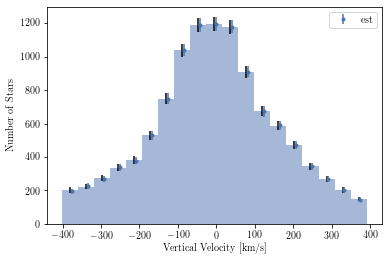

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 5 /home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.27)_(0.29).npy
reading big data...
done reading
generating


generate: 100%|██████████| 10000/10000 [00:04<00:00, 2042.42it/s]


estimating


Estimating z: 100%|██████████| 19/19 [00:00<00:00, 50.24it/s]


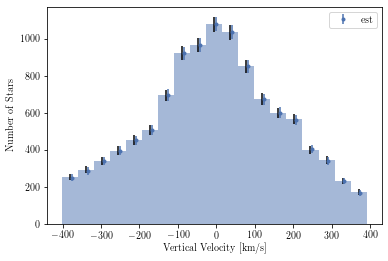

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 6 /home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.29)_(0.31).npy
reading big data...
done reading
generating


generate: 100%|██████████| 10000/10000 [00:06<00:00, 1664.62it/s]


estimating


Estimating z: 100%|██████████| 19/19 [00:00<00:00, 47.23it/s]


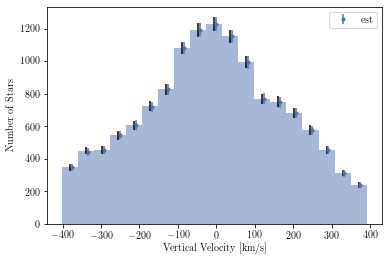

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 7 /home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.31)_(0.33).npy
reading big data...
done reading
generating


generate: 100%|██████████| 10000/10000 [00:07<00:00, 1276.35it/s]


estimating


Estimating z: 100%|██████████| 19/19 [00:00<00:00, 39.51it/s]


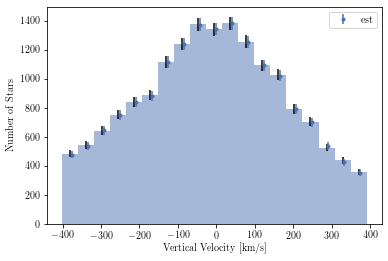

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 8 /home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.33)_(0.35).npy
reading big data...
done reading
generating


generate: 100%|██████████| 10000/10000 [00:08<00:00, 1246.79it/s]


estimating


Estimating z: 100%|██████████| 19/19 [00:00<00:00, 35.35it/s]


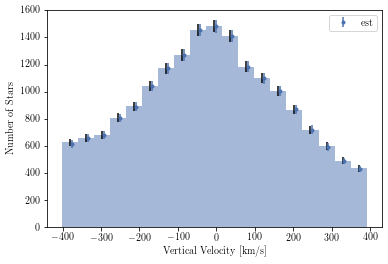

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 9 /home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.35)_(0.37).npy
reading big data...
done reading
generating


generate: 100%|██████████| 10000/10000 [00:09<00:00, 1081.20it/s]


estimating


Estimating z: 100%|██████████| 19/19 [00:00<00:00, 34.72it/s]


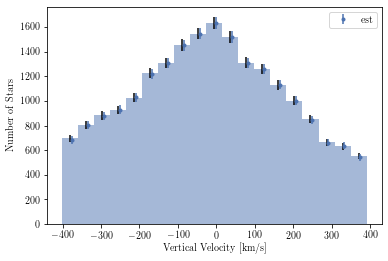

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 10 /home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.37)_(0.38).npy
reading big data...
done reading
generating


generate: 100%|██████████| 10000/10000 [00:04<00:00, 2329.35it/s]


estimating


Estimating z: 100%|██████████| 19/19 [00:00<00:00, 57.36it/s]


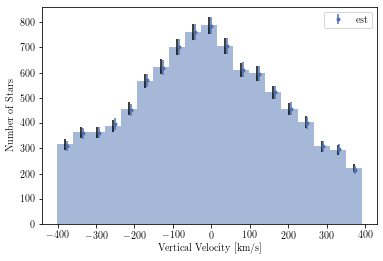

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 11 /home2/s20321005/Thesis-Project/Data/Vertical-Number-no/gaia_(0.38)_(0.40).npy
reading big data...
done reading
generating


generate: 100%|██████████| 10000/10000 [00:08<00:00, 1149.63it/s]


estimating


Estimating z: 100%|██████████| 19/19 [00:00<00:00, 39.93it/s]


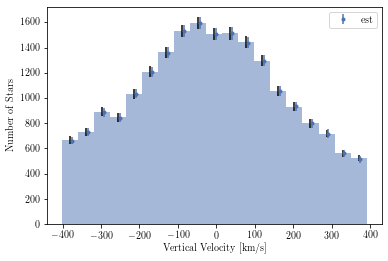

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

In [44]:
def correct_z(z, znum, compz):
    comp = compz(z)
    mask = comp == 0
    comp[mask] = 1
    corr = znum/comp
    corr[mask] = 0
    return corr

for index, file in enumerate(files):
    print(index, file)
    print('reading big data...')
    z_arr = np.load(file)
    print('done reading')
    z = df_comp['z'].to_numpy()
    frac = df_comp[str(index)].to_numpy()
    compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)
    
    zb = np.max(z)
    zmax = np.max(z_arr)
    zmin = np.min(z_arr)
    zl = np.floor(np.maximum(zmin, -zb))
    zu = np.ceil(np.minimum(zmax, zb))
    zedge = np.linspace(zl, zu, 20)

    gaia = vaex.open(spec_files[index])
    zs = gaia['z'].to_numpy()
    znum, _ = np.histogram(zs, bins=zedge)
    zmid = (zedge[1:] + zedge[:-1])/2
    zcorr = correct_z(zmid, znum, compz)
    mask = zcorr > 0
    zcorr = zcorr[mask]
    znum = znum[mask]
    zerr = zcorr/np.sqrt(znum)
    M = z_arr.shape[1]
    znum_est = np.empty((M, len(zcorr)), dtype=int)
    print("generating")
    for i in range(M):
        z_realization = z_arr[:, i]
        znum_est_i = np.histogram(z_realization, bins=zedge)[0]
        znum_est[i] = znum_est_i[mask]
    zmid = zmid[mask]
    z_est = np.empty_like(znum)
    z_err = np.empty_like(znum)
    print("estimating")
    for i in tqdm(range(len(zmid)), desc="Estimating z"):
        nz_min = np.floor(znum_est[:, i].min())
        nz_max = np.ceil(znum_est[:, i].max())
        bins = np.arange(nz_min-1/2, nz_max+1/2)
        zweight, n_edge = np.histogram(znum_est[:, i], bins=bins, density=True)
        ns = (n_edge[1:] + n_edge[:-1]) / 2
        mask = zweight > 0
        zweight = zweight[mask]
        ns = ns[mask]
        m = 5
        lambdas = np.linspace(np.maximum(0, znum[i]-m*zerr[i]), znum[i]+m*zerr[i], 10_000)
        dlambda = lambdas[1] - lambdas[0]
        pn = np.sum(zweight[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
        comp = compz(zmid[i])
        lambdas = lambdas/comp
        area = np.trapz(pn, lambdas)
        pn = pn / area
        pn =(pn[1:] + pn[:-1])/2
        dlambda = np.diff(lambdas)
        lambdas = (lambdas[1:] + lambdas[:-1])/2
        mu = np.sum(pn * lambdas * dlambda)
        
        zi_est = lambdas[np.argmax(pn)]
        z_est[i] = zi_est
        Elambda2 = np.sum(pn * lambdas**2*dlambda)
        sigma2 = Elambda2 - mu**2
        zi_err = np.sqrt(sigma2)
        z_err[i] = zi_err
    dz = np.min(np.diff(zedge))
    plt.bar(zmid-5, zcorr, yerr=zerr, width=dz, alpha=0.5)
    plt.errorbar(zmid, z_est, yerr=z_err, fmt='.', label="est")
    plt.xlabel("Vertical Velocity [km/s]")
    plt.ylabel("Number of Stars")
    plt.legend()
    # plt.yscale('log')
    plt.show()
    df = vaex.from_arrays(z=zmid, znum=z_est/z_est.max(), zerr=z_err/z_est.max())
    name = file.split("/")[-1].replace(".npy", ".hdf5")
    df.export(join(eff_dir, name), progress=True)

In [45]:
name = file.split("/")[-1].replace(".npy", ".hdf5")
join(eff_dir, name)

'/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/gaia_(0.38)_(0.40).hdf5'